# Biblioteki

In [1]:
import sklearn; print("Scikit-Learn", sklearn.__version__)

Scikit-Learn 1.4.0


In [2]:
import sklearn
import pandas as pd
import numpy as np 
from pandas import *
import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

import scipy
import scipy.stats as st
from scipy.stats import boxcox
from scipy.stats.mstats import normaltest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

print(scipy.__version__) #do sprawdzenia wersji tylko pierwsze slowo bez podmodułów
#albo
scipy.version.full_version

C:\Users\Kacper\AppData\Local\Temp\ipykernel_12192\3898324436.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1.12.0


'1.12.0'

# wczytanie danych

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) # display.width - Ta opcja ustala szerokość całkowitą wyświetlania wyjścia dla danych Pandas w konsoli. 
# Podając wartość, decydujesz, ile znaków w jednym wierszu może być wyświetlanych. Jest to szczególnie przydatne, gdy chcesz uniknąć zawijania danych 
# do nowej linii w przypadku szerokich ramek danych
pd.set_option('display.expand_frame_repr', True) #nie zastepuje czesci ramki trzema kropkami

In [4]:
df = pd.read_csv("poprawione_dane.csv", low_memory = False)
# Ustawienie low_memory na False oznacza, że pandas nie będzie starał się
# optymalizować zużycia pamięci i spróbuje wczytać cały plik CSV na raz. 
# W przypadku dużych plików CSV, to podejście może prowadzić do większego zużycia pamięci,
# ale jednocześnie może przyspieszyć operację wczytywania,
# ponieważ będą ograniczone dodatkowe operacje odczytu na kawałkach danych.

# EDA & Feature Engineering

In [5]:
#szukamy duplikatow
df.duplicated().any()

True

In [6]:
df.shape

(832011, 111)

In [7]:
duplicated_rows = df[df.duplicated(keep=False)]  # keep=False oznacza, że wszystkie duplikaty zostaną pokazane
print(duplicated_rows)

           created_at_first  is_flat  is_business  description  title    price                 city  lon_city  lat_city  lon_district  lat_district         city_district  price[currency]       m rooms_num     market building_type      floor_no  building_floors_num  building_material windows_type heating  build_year construction_status   rent rent[currency] building_ownership   free_from  extras_types_balcony  media_types_cable-television  media_types_internet  media_types_phone  security_types_closed_area  security_types_roller_shutters  equipment_types_dishwasher  equipment_types_fridge  equipment_types_oven  equipment_types_stove  equipment_types_washing_machine  extras_types_garage  extras_types_garden  extras_types_terrace  extras_types_two_storey  extras_types_usable_room  security_types_entryphone  extras_types_basement  extras_types_separate_kitchen  terrain_area  floors_num garret_type roof_type roofing location  recreational  security_types_alarm  \
44686   2018-03-05 11:51:25

I don't get the meaning of zeros in 'lon_district'  'lat_district', so I will delete it.

In [8]:
df = df.drop_duplicates()

In [9]:
print(df.columns.tolist())

['created_at_first', 'is_flat', 'is_business', 'description', 'title', 'price', 'city', 'lon_city', 'lat_city', 'lon_district', 'lat_district', 'city_district', 'price[currency]', 'm', 'rooms_num', 'market', 'building_type', 'floor_no', 'building_floors_num', 'building_material', 'windows_type', 'heating', 'build_year', 'construction_status', 'rent', 'rent[currency]', 'building_ownership', 'free_from', 'extras_types_balcony', 'media_types_cable-television', 'media_types_internet', 'media_types_phone', 'security_types_closed_area', 'security_types_roller_shutters', 'equipment_types_dishwasher', 'equipment_types_fridge', 'equipment_types_oven', 'equipment_types_stove', 'equipment_types_washing_machine', 'extras_types_garage', 'extras_types_garden', 'extras_types_terrace', 'extras_types_two_storey', 'extras_types_usable_room', 'security_types_entryphone', 'extras_types_basement', 'extras_types_separate_kitchen', 'terrain_area', 'floors_num', 'garret_type', 'roof_type', 'roofing', 'locatio

In [10]:
for column in df.columns:
    print(column)

created_at_first
is_flat
is_business
description
title
price
city
lon_city
lat_city
lon_district
lat_district
city_district
price[currency]
m
rooms_num
market
building_type
floor_no
building_floors_num
building_material
windows_type
heating
build_year
construction_status
rent
rent[currency]
building_ownership
free_from
extras_types_balcony
media_types_cable-television
media_types_internet
media_types_phone
security_types_closed_area
security_types_roller_shutters
equipment_types_dishwasher
equipment_types_fridge
equipment_types_oven
equipment_types_stove
equipment_types_washing_machine
extras_types_garage
extras_types_garden
extras_types_terrace
extras_types_two_storey
extras_types_usable_room
security_types_entryphone
extras_types_basement
extras_types_separate_kitchen
terrain_area
floors_num
garret_type
roof_type
roofing
location
recreational
security_types_alarm
security_types_anti_burglary_door
security_types_monitoring
fence_types_wire
heating_types_coal
media_types_cesspool
media

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831971 entries, 0 to 832010
Columns: 111 entries, created_at_first to created_at_first_month
dtypes: bool(74), float64(11), int64(7), object(19)
memory usage: 299.9+ MB


In [12]:
for kolumna in df.columns:
    liczba_nan = df[kolumna].isna().sum()
    if liczba_nan != (int(0)):
        print(f"{kolumna}: {liczba_nan}")

rooms_num: 268
market: 6
building_type: 164911


floor_no: 198158
building_floors_num: 234593
building_material: 425228
windows_type: 286378
heating: 427939
build_year: 266001
construction_status: 351378
rent: 558859
rent[currency]: 103072
building_ownership: 409109
free_from: 703161
terrain_area: 660968
floors_num: 691593
garret_type: 776767
roof_type: 763751
roofing: 739515
location: 776520
recreational: 759566
is_bungalow: 654792


In [13]:
missing_values_count = df.isnull().sum()

# wyrzucam kolumny gdzie jest ponad 100k brakow 
columns_to_drop = missing_values_count[(missing_values_count > 100000) & ~(missing_values_count.index.isin(['building_type', 'floor_no']))].index
df = df.drop(columns=columns_to_drop)

In [14]:
for kolumna in df.columns:
    liczba_nan = df[kolumna].isna().sum()
    if liczba_nan != (int(0)):
        print(f"{kolumna}: {liczba_nan}")

rooms_num: 268
market: 6
building_type: 164911
floor_no: 198158


In [15]:
df.dtypes

created_at_first                      object
is_flat                                int64
is_business                            int64
description                            int64
title                                  int64
price                                  int64
city                                  object
lon_city                             float64
lat_city                             float64
lon_district                         float64
lat_district                         float64
city_district                         object
price[currency]                         bool
m                                    float64
rooms_num                             object
market                                object
building_type                         object
floor_no                              object
extras_types_balcony                    bool
media_types_cable-television            bool
media_types_internet                    bool
media_types_phone                       bool
security_t

In [16]:
df.dtypes.value_counts()

bool       74
object      7
int64       7
float64     5
Name: count, dtype: int64

In [17]:
df.head(10)

,created_at_first,is_flat,is_business,description,title,price,city,lon_city,lat_city,lon_district,lat_district,city_district,price[currency],m,rooms_num,market,building_type,floor_no,extras_types_balcony,media_types_cable-television,media_types_internet,media_types_phone,security_types_closed_area,security_types_roller_shutters,equipment_types_dishwasher,equipment_types_fridge,equipment_types_oven,equipment_types_stove,equipment_types_washing_machine,extras_types_garage,extras_types_garden,extras_types_terrace,extras_types_two_storey,extras_types_usable_room,security_types_entryphone,extras_types_basement,extras_types_separate_kitchen,security_types_alarm,security_types_anti_burglary_door,security_types_monitoring,fence_types_wire,heating_types_coal,media_types_cesspool,media_types_electricity,media_types_water,access_types_asphalt,vicinity_types_forest,extras_types_attic,extras_types_pool,extras_types_lift,equipment_types_furniture,heating_types_gas,media_types_gas,fence_types_brick,media_types_cable_television,media_types_sewage,fence_types_other,access_types_hard_surfaced,vicinity_types_lake,fence_types_metal,fence_types_concrete,fence_types_wooden,extras_types_air_conditioning,heating_types_fireplace,equipment_types_tv,media_types_water_purification,heating_types_oil,vicinity_types_mountains,heating_types_electric,heating_types_heat_pump,access_types_dirt,fence_types_hedge,heating_types_solar_collector,vicinity_types_sea,heating_types_geothermal,heating_types_urban,heating_types_stove,heating_types_biomass,use_types_office,extras_types_elevator,extras_types_heating,dimensions,vicinity_types_open_terrain,extras_types_asphalt_access,use_types_gastronomy,use_types_hotel,extras_types_furniture,extras_types_parking,access_types_soft_surfaced,deposit[currency],rent_to_students,created_at_first_year,created_at_first_month
0,2018-10-06 12:20:48,1,1,1693,50,389556,Olsztyn,20.47703,53.77602,20.42342,53.76516,OlsztynDajtki,True,72.14,4,secondary,NaN,floor_1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,10
1,2019-02-18 12:17:51,1,1,1743,43,500000,Plewiska,16.81106,52.36473,0.00000,0.00000,Plewiska,True,95.00,4,secondary,ribbon,ground_floor,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019,2
2,2019-03-21 17:31:09,1,1,1345,42,238000,Białystok,23.16996,53.12988,23.10333,53.12194,BiałystokZielone Wzgórza,True,58.90,3,secondary,block,floor_3,True,True,True,False,False,False,False,True,True,True,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019,3
3,2018-11-28 23:50:45,1,1,1612,37,209000,Poznań,16.93352,52.40827,16.89380,52.39409,PoznańŁazarz,True,45.00,2,secondary,NaN,ground_floor,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [18]:
#pytanie czy usuwamy koluny z miastami i dzielnicami czy przeksztalcamy jakos i zostawiamy

# df without last row (all NaN) and columns  with
#strings like 'created_at_first' and 'city', 'city_district'
#robie model bazujacy na wspolrzednych a nazwy dzielnic i miast wyrzuce
df = df.iloc[:-1].drop(['created_at_first', 'city', 'city_district', 'lon_district', 'lat_district'], axis=1)

df.tail()

,is_flat,is_business,description,title,price,lon_city,lat_city,price[currency],m,rooms_num,market,building_type,floor_no,extras_types_balcony,media_types_cable-television,media_types_internet,media_types_phone,security_types_closed_area,security_types_roller_shutters,equipment_types_dishwasher,equipment_types_fridge,equipment_types_oven,equipment_types_stove,equipment_types_washing_machine,extras_types_garage,extras_types_garden,extras_types_terrace,extras_types_two_storey,extras_types_usable_room,security_types_entryphone,extras_types_basement,extras_types_separate_kitchen,security_types_alarm,security_types_anti_burglary_door,security_types_monitoring,fence_types_wire,heating_types_coal,media_types_cesspool,media_types_electricity,media_types_water,access_types_asphalt,vicinity_types_forest,extras_types_attic,extras_types_pool,extras_types_lift,equipment_types_furniture,heating_types_gas,media_types_gas,fence_types_brick,media_types_cable_television,media_types_sewage,fence_types_other,access_types_hard_surfaced,vicinity_types_lake,fence_types_metal,fence_types_concrete,fence_types_wooden,extras_types_air_conditioning,heating_types_fireplace,equipment_types_tv,media_types_water_purification,heating_types_oil,vicinity_types_mountains,heating_types_electric,heating_types_heat_pump,access_types_dirt,fence_types_hedge,heating_types_solar_collector,vicinity_types_sea,heating_types_geothermal,heating_types_urban,heating_types_stove,heating_types_biomass,use_types_office,extras_types_elevator,extras_types_heating,dimensions,vicinity_types_open_terrain,extras_types_asphalt_access,use_types_gastronomy,use_types_hotel,extras_types_furniture,extras_types_parking,access_types_soft_surfaced,deposit[currency],rent_to_students,created_at_first_year,created_at_first_month
832005,0,1,1445,41,1250000,21.06474,52.08422,True,240.00,5,secondary,detached,NaN,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False,False,False,True,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,2
832006,1,1,1278,3,218948,20.06512,49.98608,True,39.45,2,primary,block,ground_floor,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,9
832007,1,1,1052,33,600000,18.57300,54.44150,True,48.00,3,secondary,block,floor_8,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,3
832008,1,1,1898,50,259532,18.77438,50.30255,True,56.42,3,primary,apartment,ground_floor,True,True,True,True,True,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,9
832009,1,1,1063,47,363400,14.51525,53.39368,True,51.85,2,primary,apartment,ground_floor,True,False,False,False,False,False,Fals

In [19]:
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Unikalne wartości w kolumnie {column}: {unique_values}")

Unikalne wartości w kolumnie rooms_num: ['4' '3' '2' '6' '5' '10' '9' '7' '1' 'more' '8' nan]
Unikalne wartości w kolumnie market: ['secondary' 'primary' nan]
Unikalne wartości w kolumnie building_type: [nan 'ribbon' 'block' 'detached' 'apartment' 'semi_detached' 'tenement'
 'residence' 'house' 'infill' 'farm' 'loft' 'tenement_house' 'separate']
Unikalne wartości w kolumnie floor_no: ['floor_1' 'ground_floor' 'floor_3' nan 'floor_2' 'floor_4' 'floor_8'
 'floor_9' 'floor_7' 'floor_5' 'floor_6' 'floor_10' 'floor_higher_10'
 'garret' 'cellar']


### Rozdzielenie na mieszkania i domy


In [20]:
# Definicja funkcji mapującej typ budynku na typ nieruchomości
def map_building_to_property_type(building_type):
    # mieszkania
    #tenement - kamienica
    apartments = ['apartment', 'block', 'tenement', 'tenement_house']
    # domy
    # detached - wolnostajacy, semi_detached - blizniak
    houses = ['detached', 'semi_detached', 'house', 'farm', 'residence']
    
    if building_type in apartments:
        return 'apartment'
    elif building_type in houses:
        return 'house'
    else:
        return 'unknown'  

# mapujemy za pomcoa funkcji
df['property_type'] = df['building_type'].map(map_building_to_property_type)

# wyswietlamy
print(df[['building_type', 'property_type']].head())
df.drop(['building_type'], axis=1, inplace=True)

  building_type property_type
0           NaN       unknown
1        ribbon       unknown
2         block     apartment
3           NaN       unknown
4      detached         house


In [21]:
#chodzi o to zeby zmienic floor_no a nastepnie robic to na dwie kolumny
def transform_floor_column(row):
    if pd.isnull(row):
        return np.nan, np.nan #zwracamy po dwie rzeczy zawsze bo potem rozbijamy na dwie kolumny
    elif row == 'ground_floor':
        return 0, np.nan
    elif row == 'garret':
        return np.nan, 1
    elif row == 'cellar':
        return np.nan, 0
    elif row == 'floor_higher_10':
        return 11, np.nan
    else:
        return int(row.split('_')[1]), np.nan

df['floor'], df['garret_cellar'] = zip(*df['floor_no'].map(transform_floor_column))
#garet - poddasze
#cellar - piwnica
# Kodowanie one-hot dla kolumny 'garret_cellar'
df = pd.concat([df, pd.get_dummies(df['garret_cellar'], prefix='type', dummy_na=True)], axis=1).drop(['garret_cellar'], axis=1)
#ogolnie nie weim czy floors_num to nie nr pietra w bloku a floor_nu to liczba pieter domu ale ogolnie do ogarniecia
# Wynik
df.drop(['floor_no'], axis=1, inplace=True)


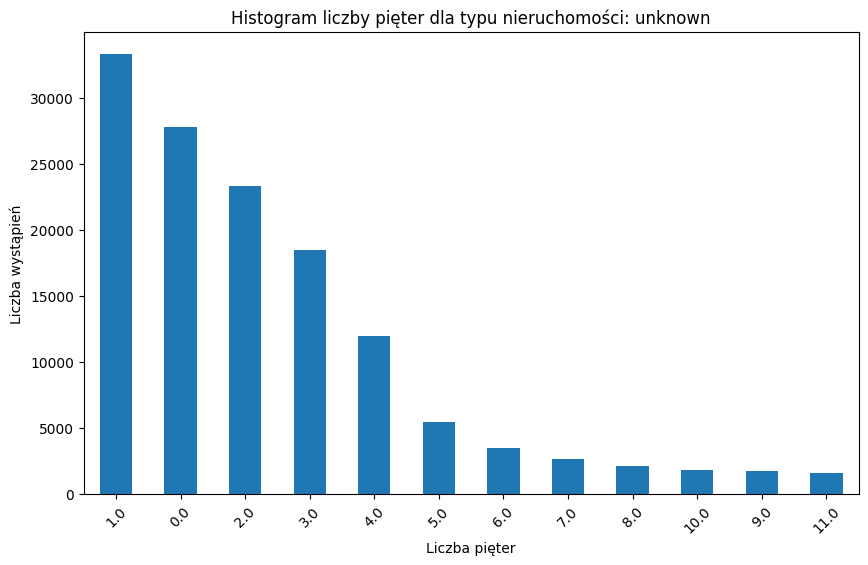

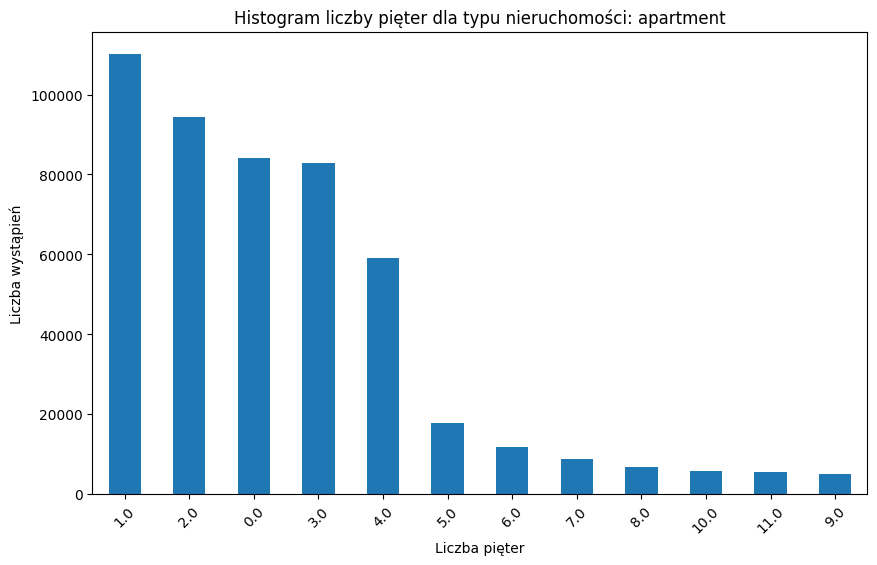

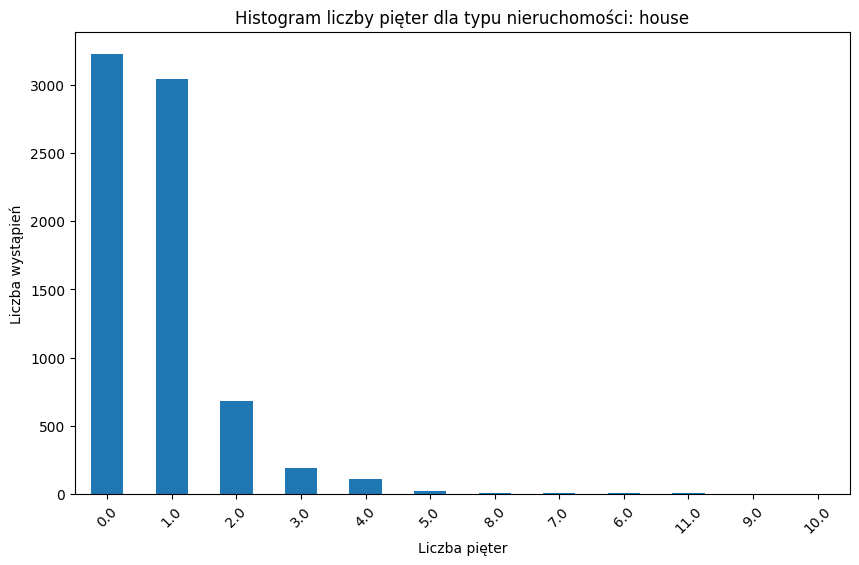

In [22]:
for property_type in df['property_type'].unique():
    # Filtrujemy DataFrame do konkretnego typu nieruchomości
    subset = df[df['property_type'] == property_type]
    # Liczymy wystąpienia każdej wartości w 'floors_num'
    counts = subset['floor'].value_counts()

    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    plt.title(f'Histogram liczby pięter dla typu nieruchomości: {property_type}')
    plt.xlabel('Liczba pięter')
    plt.ylabel('Liczba wystąpień')
    plt.xticks(rotation=45)  # Obracamy etykiety, aby były czytelniejsze
    plt.show()
    
    

Jest znacznie mniej pięter dla domów niż mieszkań co by się niby zgadzało

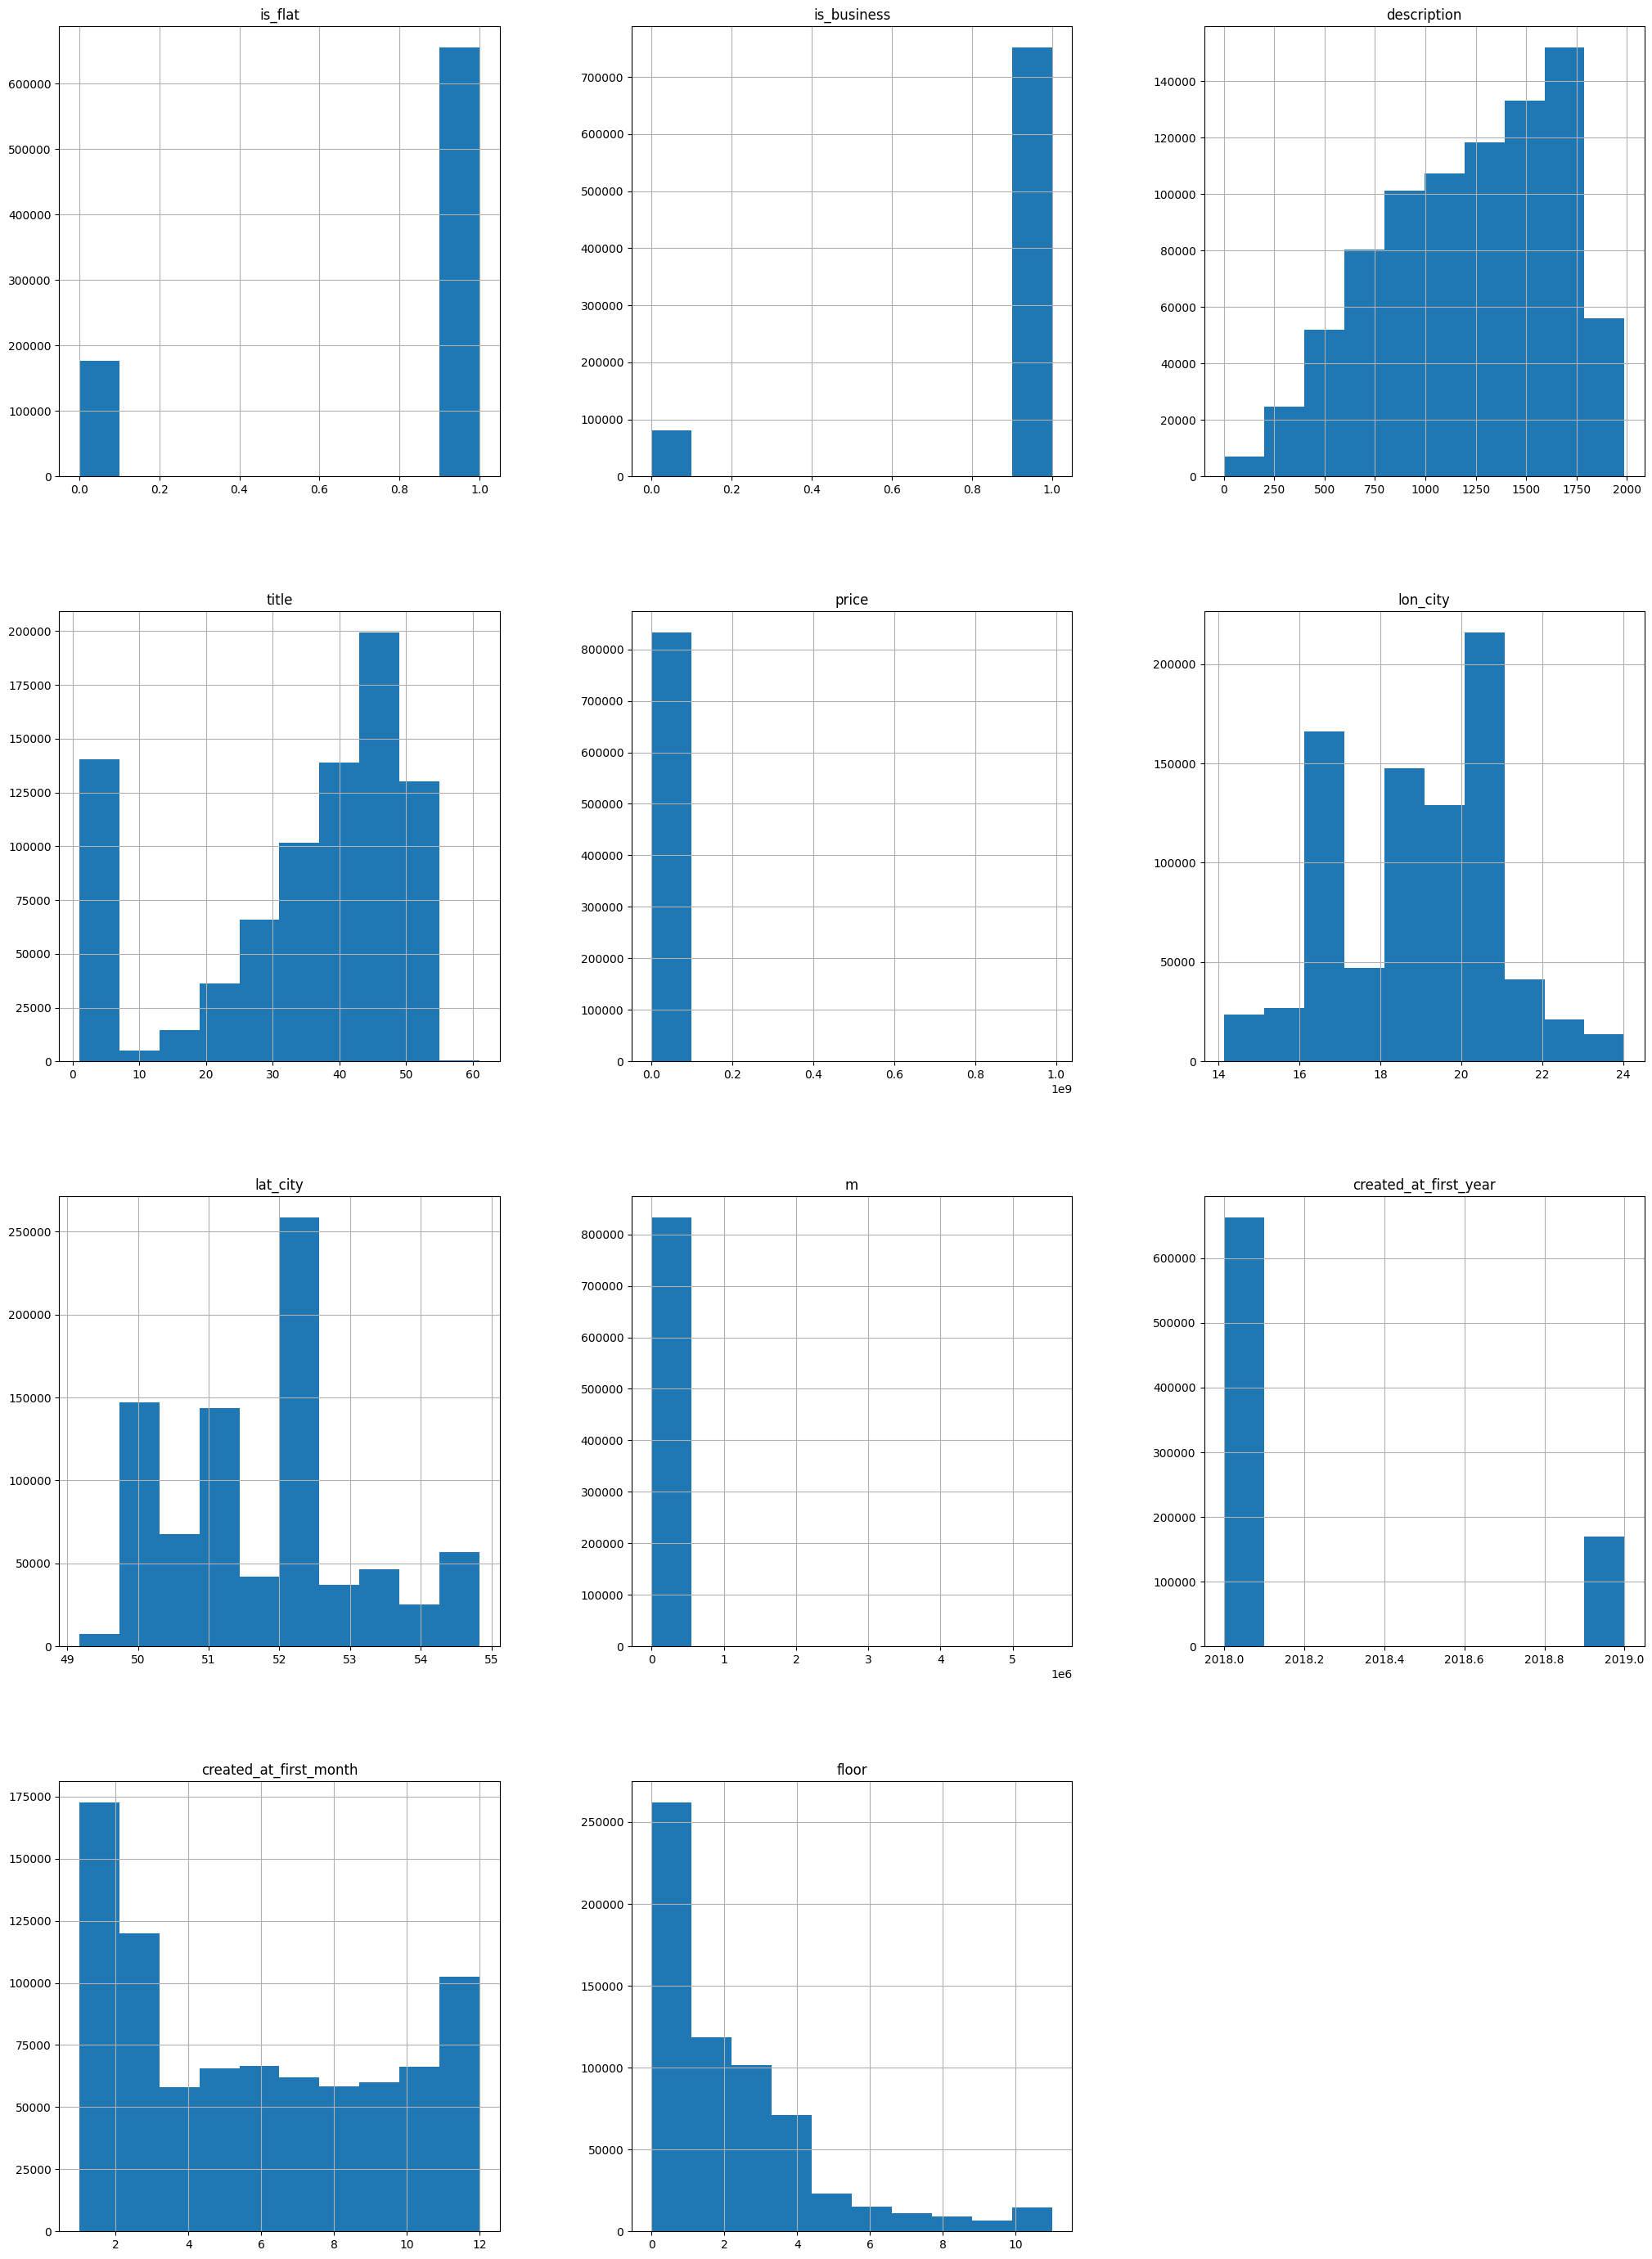

In [23]:
df.hist(figsize=(25,35))

plt.show()

In [24]:
#cos nie tak z histogramem kolumny 'm', 'building_floors_num' oraz'build_year'

In [25]:
def custom_get_dummies(df, exclude_columns=None):
    """
    Funkcja tworzy zmienne dummy dla kolumn kategorycznych DataFrame, z wyjątkiem tych wymienionych w exclude_columns.

    """
    if exclude_columns is None:
        exclude_columns = []
    

    columns_to_dummies = [col for col in df.columns if df[col].dtype == 'object' and col not in exclude_columns]
    
    df_dummies = pd.get_dummies(df, columns=columns_to_dummies, dummy_na=True)
    
    return df_dummies

#df['property']=df['property_type'].copy()
df = custom_get_dummies(df, exclude_columns=['floor_no', 'floors_num', 'rooms_num', 'property_type'])

# Podgląd wyniku
df.head()



,is_flat,is_business,description,title,price,lon_city,lat_city,price[currency],m,rooms_num,extras_types_balcony,media_types_cable-television,media_types_internet,media_types_phone,security_types_closed_area,security_types_roller_shutters,equipment_types_dishwasher,equipment_types_fridge,equipment_types_oven,equipment_types_stove,equipment_types_washing_machine,extras_types_garage,extras_types_garden,extras_types_terrace,extras_types_two_storey,extras_types_usable_room,security_types_entryphone,extras_types_basement,extras_types_separate_kitchen,security_types_alarm,security_types_anti_burglary_door,security_types_monitoring,fence_types_wire,heating_types_coal,media_types_cesspool,media_types_electricity,media_types_water,access_types_asphalt,vicinity_types_forest,extras_types_attic,extras_types_pool,extras_types_lift,equipment_types_furniture,heating_types_gas,media_types_gas,fence_types_brick,media_types_cable_television,media_types_sewage,fence_types_other,access_types_hard_surfaced,vicinity_types_lake,fence_types_metal,fence_types_concrete,fence_types_wooden,extras_types_air_conditioning,heating_types_fireplace,equipment_types_tv,media_types_water_purification,heating_types_oil,vicinity_types_mountains,heating_types_electric,heating_types_heat_pump,access_types_dirt,fence_types_hedge,heating_types_solar_collector,vicinity_types_sea,heating_types_geothermal,heating_types_urban,heating_types_stove,heating_types_biomass,use_types_office,extras_types_elevator,extras_types_heating,dimensions,vicinity_types_open_terrain,extras_types_asphalt_access,use_types_gastronomy,use_types_hotel,extras_types_furniture,extras_types_parking,access_types_soft_surfaced,deposit[currency],rent_to_students,created_at_first_year,created_at_first_month,property_type,floor,type_0.0,type_1.0,type_nan,market_primary,market_secondary,market_nan
0,1,1,1693,50,389556,20.47703,53.77602,True,72.14,4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,10,unknown,1.0,False,False,True,False,True,False
1,1,1,1743,43,500000,16.81106,52.36473,True,95.00,4,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019,2,unknown,0.0,False,False,True,False,True,False
2,1,1,1345,42,238000,23.16996,53.12988,True,58.90,3,True,True,True,False,False,False,False,True,True,True,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019,3,apartment,3.0,False,False,True,False,True,False
3,1,1,1612,37,209000,16.93352,52.40827,True,45.00,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,11,unknown,0.0,False,False,True,False,True,False
4

In [26]:
df['floor'].head()

0    1.0
1    0.0
2    3.0
3    0.0
4    NaN
Name: floor, dtype: float64

In [27]:
df.rooms_num=to_numeric(df["rooms_num"].replace("more", "11"))
# Podobno Scikit-Learn akceptuje boolowskie wartosci, ale i tak zamienie 


In [28]:
#model akceptuje False i True ale zamieniam 
df.replace({False: 0, True: 1}, inplace=True)
#trwa prawie min

C:\Users\Kacper\AppData\Local\Temp\ipykernel_12192\1352390531.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1}, inplace=True)


In [29]:
df.head()

,is_flat,is_business,description,title,price,lon_city,lat_city,price[currency],m,rooms_num,extras_types_balcony,media_types_cable-television,media_types_internet,media_types_phone,security_types_closed_area,security_types_roller_shutters,equipment_types_dishwasher,equipment_types_fridge,equipment_types_oven,equipment_types_stove,equipment_types_washing_machine,extras_types_garage,extras_types_garden,extras_types_terrace,extras_types_two_storey,extras_types_usable_room,security_types_entryphone,extras_types_basement,extras_types_separate_kitchen,security_types_alarm,security_types_anti_burglary_door,security_types_monitoring,fence_types_wire,heating_types_coal,media_types_cesspool,media_types_electricity,media_types_water,access_types_asphalt,vicinity_types_forest,extras_types_attic,extras_types_pool,extras_types_lift,equipment_types_furniture,heating_types_gas,media_types_gas,fence_types_brick,media_types_cable_television,media_types_sewage,fence_types_other,access_types_hard_surfaced,vicinity_types_lake,fence_types_metal,fence_types_concrete,fence_types_wooden,extras_types_air_conditioning,heating_types_fireplace,equipment_types_tv,media_types_water_purification,heating_types_oil,vicinity_types_mountains,heating_types_electric,heating_types_heat_pump,access_types_dirt,fence_types_hedge,heating_types_solar_collector,vicinity_types_sea,heating_types_geothermal,heating_types_urban,heating_types_stove,heating_types_biomass,use_types_office,extras_types_elevator,extras_types_heating,dimensions,vicinity_types_open_terrain,extras_types_asphalt_access,use_types_gastronomy,use_types_hotel,extras_types_furniture,extras_types_parking,access_types_soft_surfaced,deposit[currency],rent_to_students,created_at_first_year,created_at_first_month,property_type,floor,type_0.0,type_1.0,type_nan,market_primary,market_secondary,market_nan
0,1,1,1693,50,389556,20.47703,53.77602,1,72.14,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,10,unknown,1.0,0,0,1,0,1,0
1,1,1,1743,43,500000,16.81106,52.36473,1,95.00,4.0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,2,unknown,0.0,0,0,1,0,1,0
2,1,1,1345,42,238000,23.16996,53.12988,1,58.90,3.0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,3,apartment,3.0,0,0,1,0,1,0
3,1,1,1612,37,209000,16.93352,52.40827,1,45.00,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,11,unknown,0.0,0,0,1,0,1,0
4,0,0,1665,45,729000,20.65332,52.47617,1,195.00,6.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,1,house,NaN,0,0,1,0,1,0


In [30]:
df.shape

(831970, 93)

In [31]:
df.describe().round(2)

,is_flat,is_business,description,title,price,lon_city,lat_city,price[currency],m,rooms_num,extras_types_balcony,media_types_cable-television,media_types_internet,media_types_phone,security_types_closed_area,security_types_roller_shutters,equipment_types_dishwasher,equipment_types_fridge,equipment_types_oven,equipment_types_stove,equipment_types_washing_machine,extras_types_garage,extras_types_garden,extras_types_terrace,extras_types_two_storey,extras_types_usable_room,security_types_entryphone,extras_types_basement,extras_types_separate_kitchen,security_types_alarm,security_types_anti_burglary_door,security_types_monitoring,fence_types_wire,heating_types_coal,media_types_cesspool,media_types_electricity,media_types_water,access_types_asphalt,vicinity_types_forest,extras_types_attic,extras_types_pool,extras_types_lift,equipment_types_furniture,heating_types_gas,media_types_gas,fence_types_brick,media_types_cable_television,media_types_sewage,fence_types_other,access_types_hard_surfaced,vicinity_types_lake,fence_types_metal,fence_types_concrete,fence_types_wooden,extras_types_air_conditioning,heating_types_fireplace,equipment_types_tv,media_types_water_purification,heating_types_oil,vicinity_types_mountains,heating_types_electric,heating_types_heat_pump,access_types_dirt,fence_types_hedge,heating_types_solar_collector,vicinity_types_sea,heating_types_geothermal,heating_types_urban,heating_types_stove,heating_types_biomass,use_types_office,extras_types_elevator,extras_types_heating,dimensions,vicinity_types_open_terrain,extras_types_asphalt_access,use_types_gastronomy,use_types_hotel,extras_types_furniture,extras_types_parking,access_types_soft_surfaced,deposit[currency],rent_to_students,created_at_first_year,created_at_first_month,floor,type_0.0,type_1.0,type_nan,market_primary,market_secondary,market_nan
count,831970.00,831970.0,831970.00,831970.00,8.319700e+05,831970.00,831970.00,831970.0,831970.00,831702.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.0,831970.0,831970.0,831970.0,831970.0,831970.0,831970.0,831970.0,831970.0,831970.0,831970.0,831970.0,831970.0,831970.0,831970.00,632539.00,831970.00,831970.00,831970.00,831970.00,831970.00,831970.0
mean,0.79,0.9,1216.38,33.44,4.550467e+05,19.11,51.78,1.0,125.12,3.13,0.47,0.29,0.39,0.25,0.16,0.03,0.04,0.06,0.07,0.08,0.04,0.41,0.05,0.07,0.02,0.09,0.30,0.35,0.14,0.05,0.16,0.16,0.04,0.02,0.03,0.15,0.13,0.10,0.04,0.03,0.00,0.33,0.11,0.08,0.11,0.02,0.02,0.09,0.01,0.05,0.01,0.03,0.01,0.01,0.02,0.03,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.2,5.87,2.44,0.00,0.00,1.00,0.31,0.69,0.0
std,0.41,0.3,434.13,16.09,1.560278e+06,1.98,1.28,0.0,7042.98,1.51,0.50,0.45,0.49,0.43,0.36,0.18,0.20,0.24,0.25,0.27,0.21,0.49,0.22,0.25,0.13,0.28,0.46,0.48,0.35,0.22,0.37,0.36,0.19,0.15,0.18,0.36,0.33,0.29,0.20,0.18,0.04,0.47,0.32,0.28,0.31,0.12,0.13,0.29,0.12,0.21,0.12,0.17,0.08,0.11,0.14,0.17,0.12,0.07,0.06,0.07,0.07,0.06,0.05,0.07,0.04,0.04,0.01,0.07,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.39,2.29,0.02,0.03,0.04,0.46,0.46,0.0
min,0.00,0.0,1.00,1.00,5.000000e+03,14.15,49.17,1.0,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

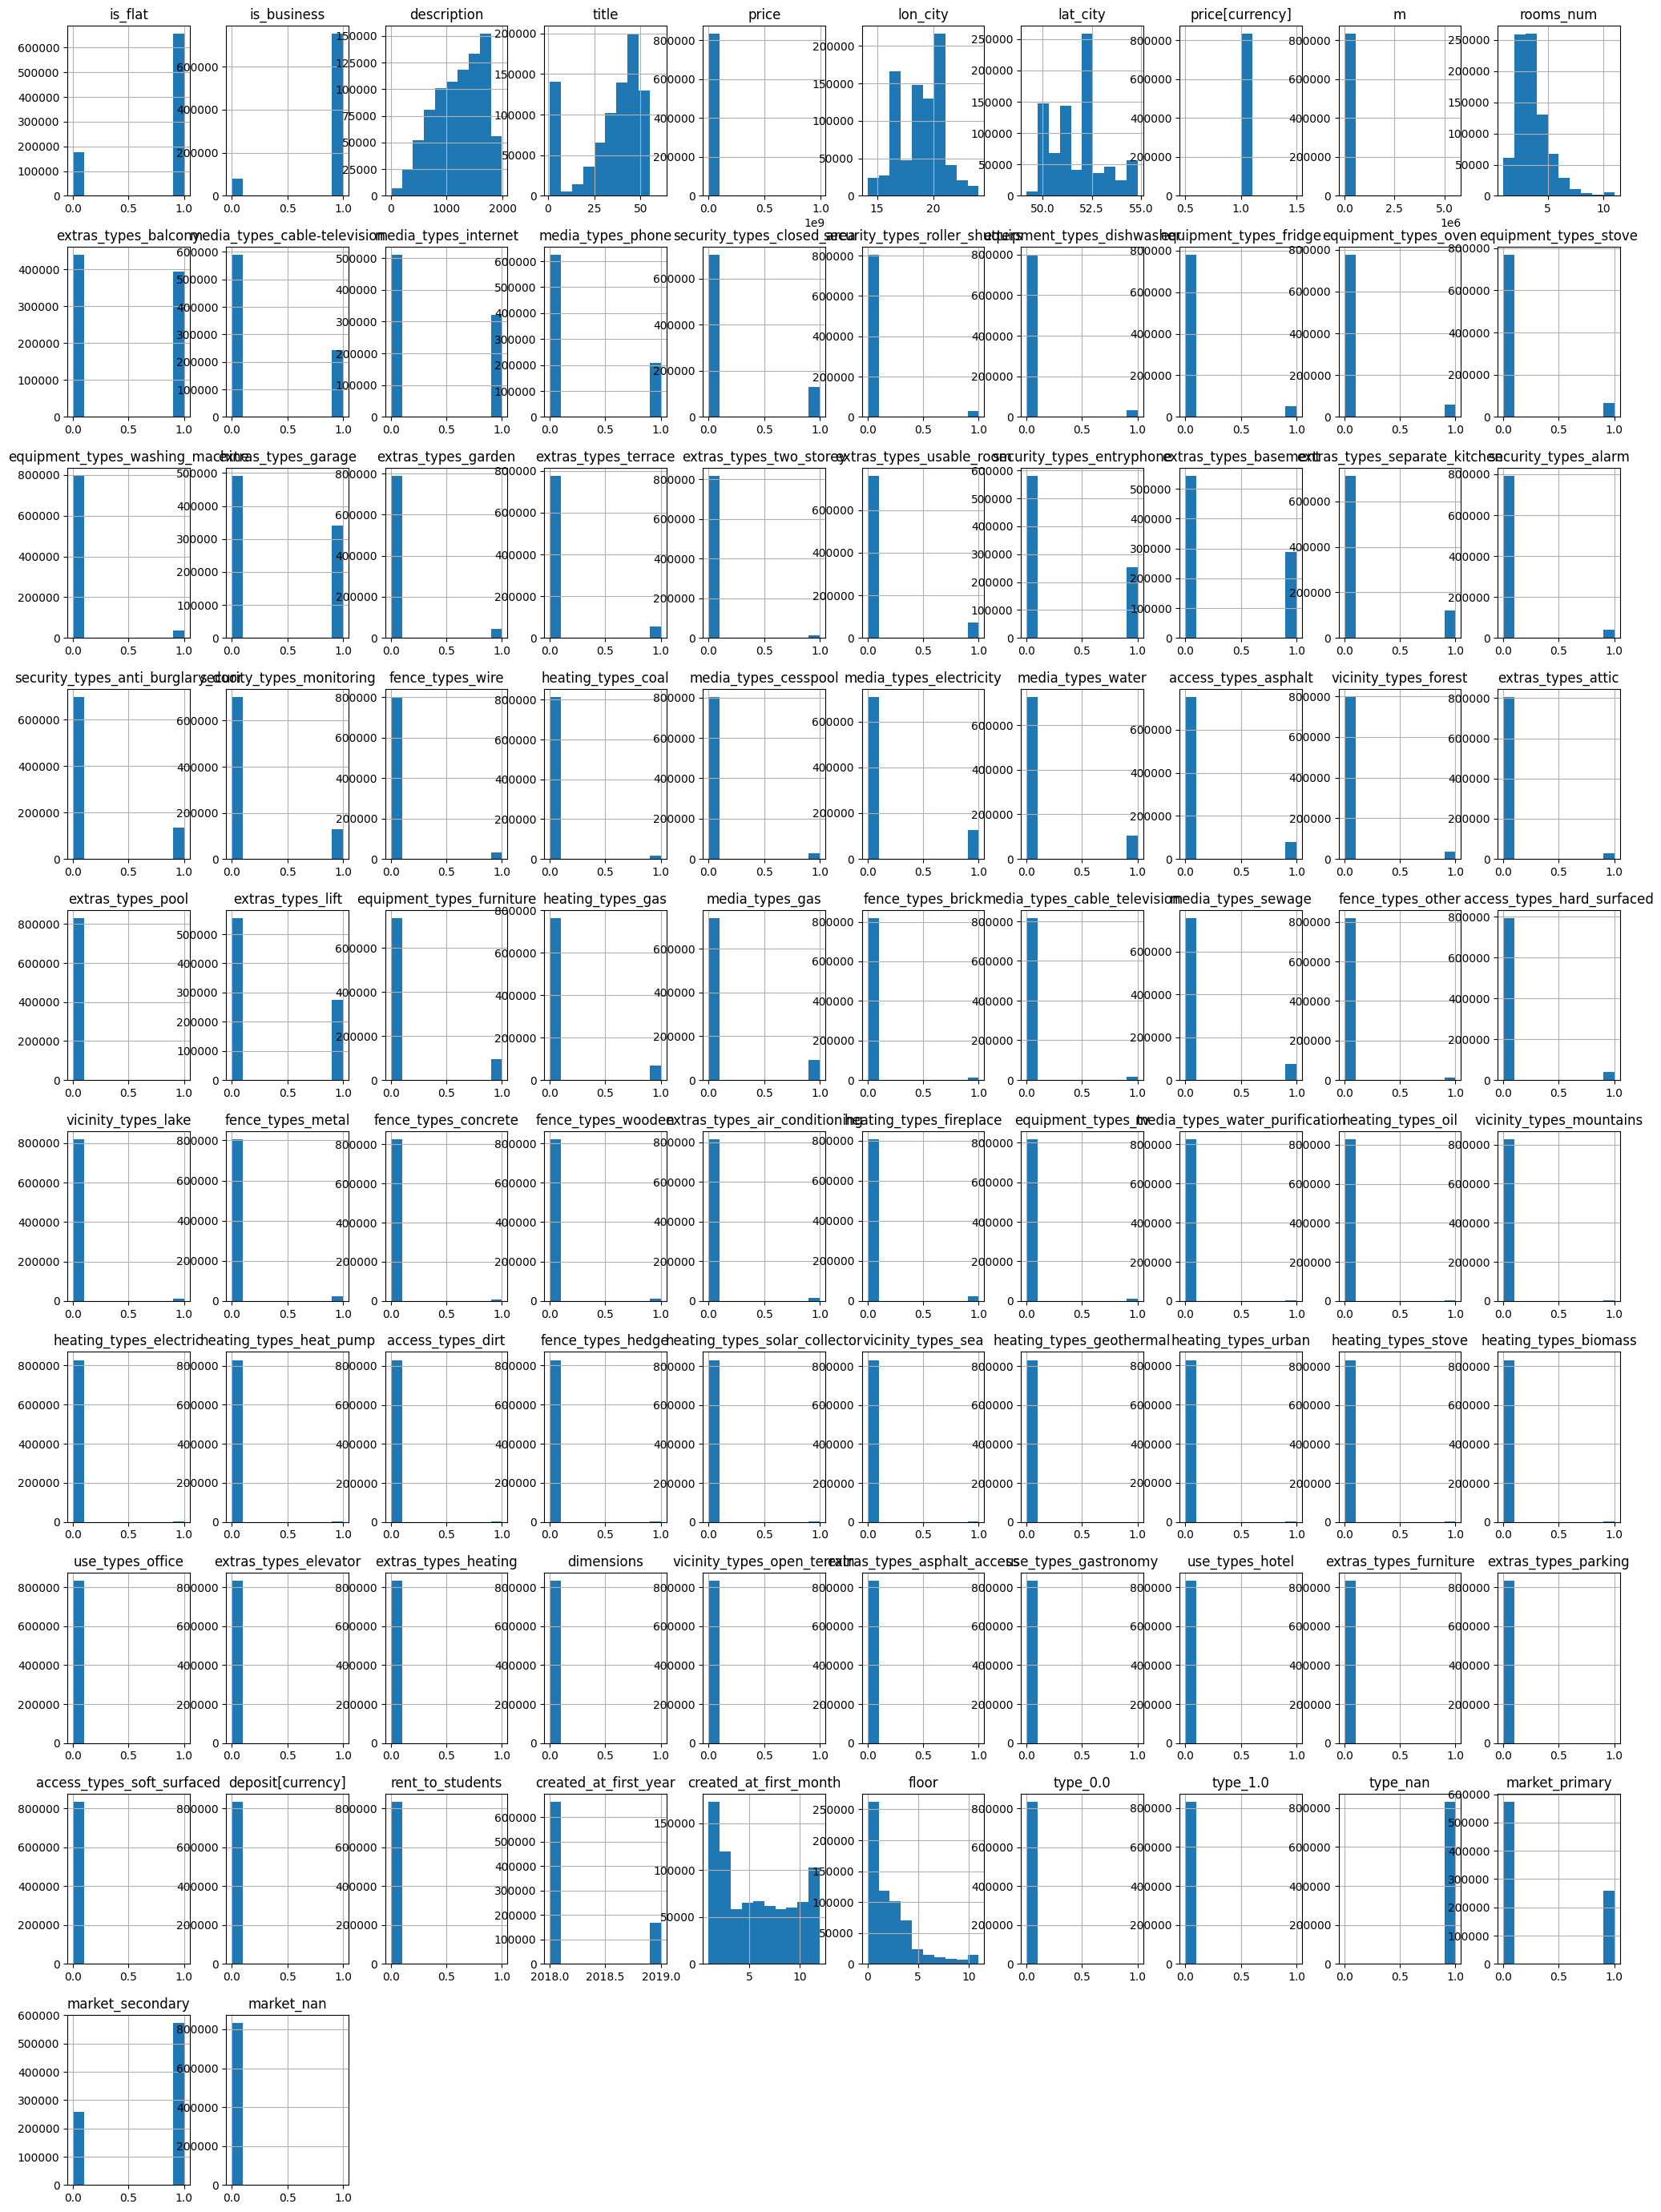

In [32]:
df.hist(figsize=(25,35))

plt.show() #bierze pod uwage tylko float oraz int (boolean nie)

In [33]:
#print(scipy.stats.shapiro(df.description)) #shapiro nie nadaje sie do duzych prob

- Dla 'sqrt - 2' w obu kolumnach statystyka dla title zmniejsza sie a dla descirption na odwrot
- Dla 'boxcox- 3' w obu kolumnach statystyka zwiększa się więc mniej podobny do rozkładu normalnego.
Bez względu na zmniejszanie/zwiększanie się statystyki nie zmienia to nic p-value.

C:\Users\Kacper\AppData\Local\Temp\ipykernel_12192\4236843610.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[112.55119025  92.78923566  90.033424   ...  66.06764723 112.55119025
 103.98347509]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  draft[draft > 0] = transformed_data  # Aktualizujemy tylko wartości dodatnie


Przed zmianą - Statistics=104004.630249811, p=0.000000000
Po zmianie - Statistics=126493.211278164, p=0.000000000


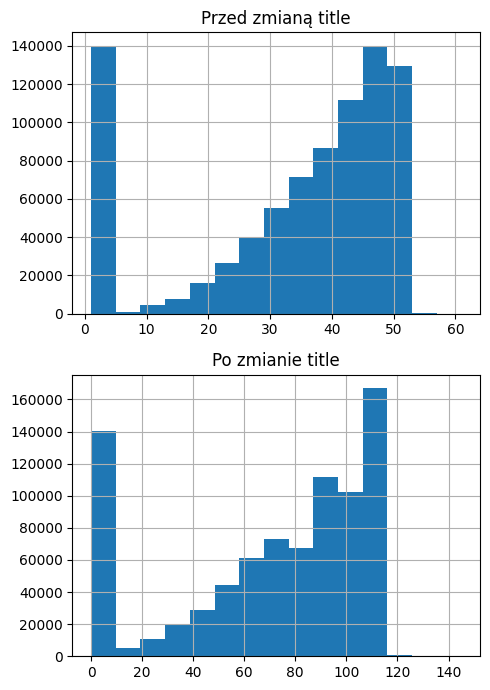

C:\Users\Kacper\AppData\Local\Temp\ipykernel_12192\4236843610.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 9536.19337236  9893.60227094  7129.19930478 ...  5225.65952508
 11018.59558511  5294.83380213]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  draft[draft > 0] = transformed_data  # Aktualizujemy tylko wartości dodatnie


Przed zmianą - Statistics=92527.877790901, p=0.000000000
Po zmianie - Statistics=226759.945005417, p=0.000000000


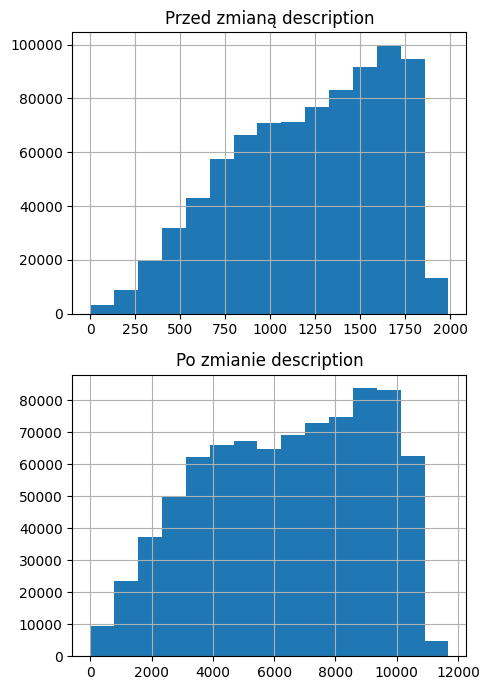

In [34]:
from scipy.stats.mstats import normaltest  # D'Agostino K^2 Test
from scipy.stats import boxcox
import scipy.stats as stats

def normalisation(column, what_transformation, nazwa_col):
    draft = column.copy()  # Kopiujemy kolumnę do lokalnej zmiennej 'draft'
    if what_transformation == 1:
        draft = np.log(draft[draft > 0])  # Logarytmujemy wartości dodatnie
    elif what_transformation == 2:
        draft = np.sqrt(draft) 
    elif what_transformation == 3:
        # Boxcox wymaga tylko wartości dodatnich, najpierw filtrujemy te wartości.
        positive_values = draft[draft > 0]
        transformed_data, _ = boxcox(positive_values)  #Box-Cox
        draft[draft > 0] = transformed_data  # Aktualizujemy tylko wartości dodatnie
    elif what_transformation == 4:
        draft = draft ** 2  # Podnosimy wartości do kwadratu

    # Test normalności przed przekształceniem
    stat, p = normaltest(column.dropna())  # Usuwamy NaN przed testem
    print(f'Przed zmianą - Statistics={stat:.9f}, p={p:.9f}')
    
    # Test normalności po przekształceniu
    stat, p = normaltest(draft.dropna())  # Ponownie usuwamy NaN
    print(f'Po zmianie - Statistics={stat:.9f}, p={p:.9f}')
    
    # Rysowanie histogramów przed i po przekształceniu
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 7))
    column.hist(ax=axes[0], bins=15)
    axes[0].set_title(f'Przed zmianą {nazwa_col}')
    draft.hist(ax=axes[1], bins=15)
    axes[1].set_title(f'Po zmianie {nazwa_col}')
    plt.tight_layout()
    plt.show()


normalisation(df['title'], 3, 'title')
normalisation(df['description'], 3, 'description')


Nie udało się uzyskać pożądanego efektu, zostawiam.

In [35]:
df.describe().round(2)['lat_city']

count    831970.00
mean         51.78
std           1.28
min          49.17
25%          50.78
50%          52.08
75%          52.39
max          54.83
Name: lat_city, dtype: float64

<Figure size 1500x800 with 0 Axes>

C:\Users\Kacper\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


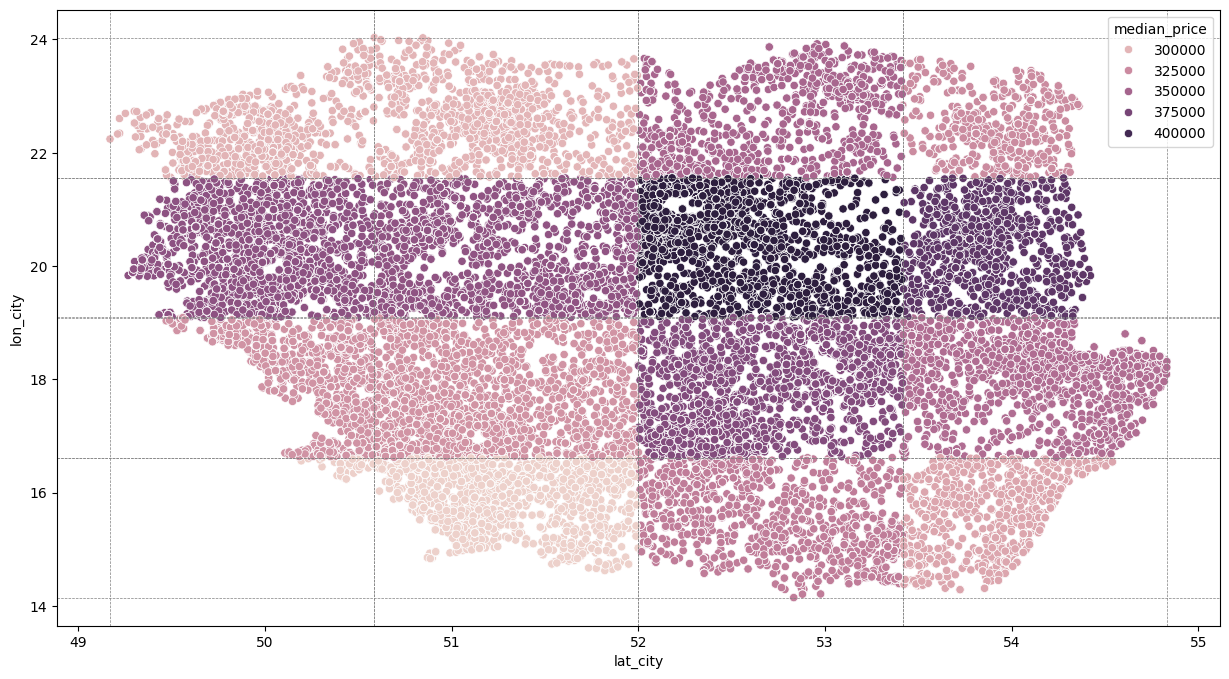

In [36]:
from statistics import median # albo numpy.median np.median() albo transform('median')

plt.figure(figsize=(15, 8))

num_bins = 4 #4x4 to bedzie teoretyczne 16 wojewodztw
df['lat_bin'] = pd.cut(df['lat_city'], bins=num_bins, labels=False)
df['lon_bin'] = pd.cut(df['lon_city'], bins=num_bins, labels=False)

# Obliczanie mediany dla każdego obszaru
median_price_by_lat_bin = df.groupby('lat_bin')['price'].transform('median')
median_price_by_lon_bin = df.groupby('lon_bin')['price'].transform('median')

df['median_price'] = (median_price_by_lat_bin + median_price_by_lon_bin) / 2

plt.figure(figsize=(15, 8))
sns.scatterplot(x="lat_city", y="lon_city", data=df, hue='median_price')
# Dodawanie linii granicznych
for i in range(num_bins):
    plt.axvline(df[df['lat_bin'] == i]['lat_city'].min(), color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(df[df['lat_bin'] == i]['lat_city'].max(), color='gray', linestyle='--', linewidth=0.5)
    plt.axhline(df[df['lon_bin'] == i]['lon_city'].min(), color='gray', linestyle='--', linewidth=0.5)
    plt.axhline(df[df['lon_bin'] == i]['lon_city'].max(), color='gray', linestyle='--', linewidth=0.5)

plt.show()

Mediana cen mieszkań w województwie mazowieckim jest największa.

In [37]:
df=df.drop(columns=["median_price"])

In [38]:
df=pd.get_dummies(df, columns=['property_type'], dummy_na=True)

In [43]:
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Unikalne wartości w kolumnie {column}: {unique_values}")

In [39]:
df.to_csv('poprawione_dane_v2.csv', index = False)

In [40]:
for kolumna in df.columns:
    liczba_nan = df[kolumna].isna().sum()
    if liczba_nan != (int(0)):
        print(f"{kolumna}: {liczba_nan}")

rooms_num: 268
floor: 199431
